<div>
<img src="logo.jpg" width="1000"/>
</div>

### Contenido:

- 1) Introducción a ShortTrade
- 2) Dataset y Analisis de Variables
- 3) Desarrollo del Modelo
- 4) Conlusiones
- 5) Aplicacion del Modelo Predictivo !

## 1. Introducción a ShortTrade

***ShortTrade*** es un algoritmo escrito en Python que busca realizar simples predicciones en la variacion de el precio de las acciones en el mercado financiero. Con el uso de redes neuroinales de multiples capas y neuronas para modelizar el comportamiento temporal se busca implementar un algoritmo de machine learning que busca tratar de predecir valores futuros a corto plazo a base de datos financieros previos de varias empresas (en este caso de Wells Fargo).

Se pueden realizar predicciones financieras a 1 o mas periodos ingresando las variables requeridas por el algoritmo. El algoritmo logra obtener un SCORE o R2 que indica la confianza con la prediccion.

## 2. Dataset y Analisis de Variables
### 2.1 Dataset

Para el presente trabajo se recopilo un conjunto de datos financieros a partir de las siguiente pagina web:

- https://finance.yahoo.com/ / 

## 3.  Desarrollo del Modelo

In [4]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error , r2_score
df=pd.read_csv('WFC.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1973-06-01,1.151042,1.169271,1.151042,1.158854,0.202131,33600
1,1973-06-04,1.158854,1.158854,1.151042,1.158854,0.202131,57600
2,1973-06-05,1.158854,1.190104,1.158854,1.179688,0.205764,331200
3,1973-06-06,1.190104,1.190104,1.190104,1.190104,0.207581,28800
4,1973-06-07,1.190104,1.190104,1.190104,1.190104,0.207581,115200
...,...,...,...,...,...,...,...
12519,2023-01-20,43.080002,43.939999,42.759998,43.919998,43.919998,23227300
12520,2023-01-23,43.939999,45.180000,43.869999,45.029999,45.029999,19692000
12521,2023-01-24,44.910000,45.200001,40.009998,44.450001,44.450001,13697200
12522,2023-01-25,44.049999,45.419998,44.029999,45.340000,45.340000,17285300


In [5]:
df=pd.read_csv('WFC.csv', usecols=[1])

In [6]:
dataset = df.values # Convert pandas dataframe to numpy array
dataset = dataset.astype('float32') #values to float
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

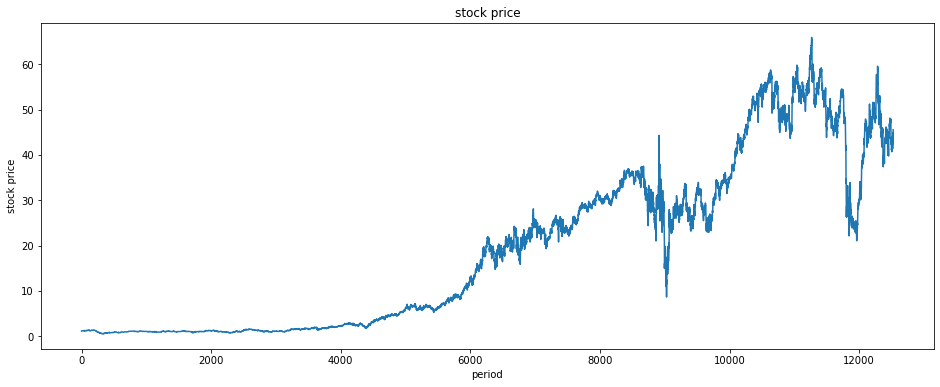

In [7]:
plt.figure(figsize=(16,6))
plt.xlabel('period')
plt.ylabel('stock price')
plt.title('stock price')
plt.plot(scaler.inverse_transform(dataset))
plt.show()

In [8]:
train_size = int(len(dataset) * 0.66) 
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [9]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []    
    for i in range(len(dataset)-seq_size):      
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

seq_size = 10

In [10]:
trainX, trainY = to_sequences(train, seq_size)
testX, testY = to_sequences(test, seq_size)

In [11]:
model = Sequential()
model.add(Dense(64, input_dim=seq_size, activation='relu')) 
model.add(Dense(32, activation='relu'))  
model.add(Dense(1)) #here activation is lineal by default
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['acc'])
model.fit(trainX, trainY, validation_data=(testX, testY),verbose=2, epochs=100)

Epoch 1/100
258/258 - 2s - loss: 6.2044e-04 - acc: 1.2114e-04 - val_loss: 5.2560e-04 - val_acc: 2.3535e-04 - 2s/epoch - 8ms/step
Epoch 2/100
258/258 - 0s - loss: 3.3915e-05 - acc: 1.2114e-04 - val_loss: 4.8176e-04 - val_acc: 2.3535e-04 - 469ms/epoch - 2ms/step
Epoch 3/100
258/258 - 1s - loss: 2.7773e-05 - acc: 1.2114e-04 - val_loss: 3.4082e-04 - val_acc: 2.3535e-04 - 515ms/epoch - 2ms/step
Epoch 4/100
258/258 - 0s - loss: 2.3895e-05 - acc: 1.2114e-04 - val_loss: 2.9642e-04 - val_acc: 2.3535e-04 - 453ms/epoch - 2ms/step
Epoch 5/100
258/258 - 0s - loss: 1.9992e-05 - acc: 1.2114e-04 - val_loss: 2.7072e-04 - val_acc: 2.3535e-04 - 461ms/epoch - 2ms/step
Epoch 6/100
258/258 - 0s - loss: 1.9796e-05 - acc: 1.2114e-04 - val_loss: 2.3256e-04 - val_acc: 2.3535e-04 - 456ms/epoch - 2ms/step
Epoch 7/100
258/258 - 0s - loss: 1.9627e-05 - acc: 1.2114e-04 - val_loss: 2.2523e-04 - val_acc: 2.3535e-04 - 454ms/epoch - 2ms/step
Epoch 8/100
258/258 - 0s - loss: 1.8372e-05 - acc: 1.2114e-04 - val_loss: 2.147

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY_inverse = scaler.inverse_transform([testY])

133/133 [==============================] - 0s 1ms/step


In [15]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[seq_size:len(trainPredict)+seq_size, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2):len(dataset), :] = testPredict

1/1 [==============================] - 0s 46ms/step
[[44.69663]]


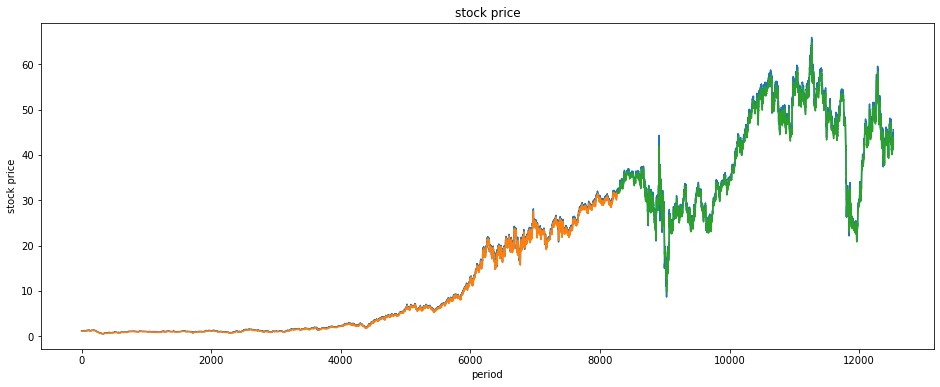

Train Score: %.2f RMSE  0.288506155963883
Test Score: %.2f RMSE  1.0529939629672915
r2 train 0.9991353610871633
r2 test 0.9911703158907496


In [16]:
predictionpoint=dataset[len(dataset)-10:len(dataset),:]
predictionpoint=np.array(predictionpoint).T.tolist()
predictionfuture = model.predict(predictionpoint)
predictionfuture = scaler.inverse_transform(predictionfuture)
print(predictionfuture)

plt.figure(figsize=(16,6))
plt.xlabel('period')
plt.ylabel('stock price')
plt.title('stock price')
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print('Train Score: %.2f RMSE ', math.sqrt(mean_squared_error(trainY_inverse[0], trainPredict[:,0])))
print('Test Score: %.2f RMSE ', math.sqrt(mean_squared_error(testY_inverse[0], testPredict[:,0])))
print('r2 train',r2_score(trainY_inverse[0], trainPredict[:,0]))
print('r2 test',r2_score(testY_inverse[0], testPredict[:,0]))